In [3]:
import pandas as pd
pm_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\241-152\\finalproject\\new_cleaned_data.csv")

In [ ]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
o3_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\241-152\\finalproject\\new_cleaned_data.csv")
# o3_data = pm_data.drop(["stationID"],axis=1)
o3_data["DATETIMEDATA"] = pd.to_datetime(o3_data["DATETIMEDATA"])
o3_data

,DATETIMEDATA,PM25,O3,WS,TEMP,RH,WD
0,2024-01-01 00:00:00,16.5,16.0,1,27,79,115
1,2024-01-01 01:00:00,33.6,0.0,1,27,82,97
2,2024-01-01 02:00:00,34.2,0.0,1,26,84,96
3,2024-01-01 03:00:00,20.1,0.0,1,26,82,108
4,2024-01-01 04:00:00,16.5,1.0,1,27,79,106
...,...,...,...,...,...,...,...
1387,2024-02-27 19:00:00,21.7,9.0,1,29,67,162
1388,2024-02-27 20:00:00,17.5,1.0,1,29,68,134
1389,2024-02-27 21:00:00,21.1,0.0,1,29,69,140
1390,2024-02-27 22:00:00,23.2,0.0,1,29,70,111


In [6]:
from pycaret.regression import *
s = setup(o3_data, target = 'O3', session_id = 123,date_features=["DATETIMEDATA"],normalize=True)

,Description,Value
0,Session id,123
1,Target,O3
2,Target type,Regression
3,Original data shape,"(1392, 7)"
4,Transformed data shape,"(1392, 9)"
5,Transformed train set shape,"(974, 9)"
6,Transformed test set shape,"(418, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


In [7]:
model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.2099,99.4519,9.4450,0.2835,0.9813,1.3436,0.0640
et,Extra Trees Regressor,6.0231,103.9345,9.6374,0.2505,0.9758,1.2654,0.0470
gbr,Gradient Boosting Regressor,6.7180,105.2570,9.7709,0.2329,1.0233,1.4676,0.0230
lightgbm,Light Gradient Boosting Machine,6.6039,105.7687,9.7751,0.2292,1.0176,1.3805,0.1370
knn,K Neighbors Regressor,6.7506,114.2686,10.1934,0.1549,1.0437,1.4002,0.0100
br,Bayesian Ridge,7.6407,116.4104,10.3543,0.1330,1.0810,1.6379,0.0090
lr,Linear Regression,7.6241,116.4480,10.3580,0.1319,1.0748,1.6241,0.3920
ridge,Ridge Regression,7.6244,116.4442,10.3578,0.1319,1.0749,1.6245,0.0070
lar,Least Angle Regression,7.6241,116.4480,10.3580,0.1319,1.0748,1.6241,0.0070
huber,Huber Regressor,7.4167,118.9621,10.4515,0.1195,1.0158,1.3672,0.0080


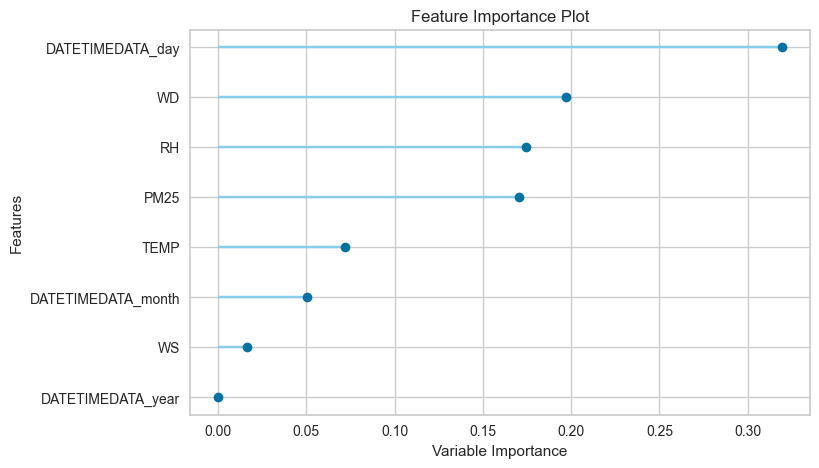

In [ ]:
plot_model(model, plot="feature")

In [8]:
model001 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7643,138.4223,11.7653,0.3404,0.9797,1.1249
1,8.6060,318.3543,17.8425,0.0772,1.0213,1.3763
2,5.3193,56.6710,7.5280,0.3303,0.9423,1.4810
3,5.4284,56.8430,7.5394,0.4135,0.8343,1.2972
4,7.2853,117.3151,10.8312,-0.0803,1.1365,1.4918
5,5.0838,44.1070,6.6413,0.3936,1.0236,1.7406
6,5.6237,50.3243,7.0940,0.4421,0.9875,1.2056
7,6.5886,82.2857,9.0711,0.2345,0.9478,1.2843
8,5.4425,65.0815,8.0673,0.3231,0.9142,0.9473


In [9]:
tuned_model001 = tune_model(model001)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.7134,140.5033,11.8534,0.3305,1.0021,1.1250
1,8.4735,314.4949,17.7340,0.0884,1.0002,1.3419
2,5.3043,55.9607,7.4807,0.3387,0.9716,1.4648
3,5.7804,57.6511,7.5928,0.4051,0.8514,1.3957
4,7.1504,105.2061,10.2570,0.0312,1.1367,1.5109
5,5.2064,46.4704,6.8169,0.3611,1.0490,1.8016
6,5.9375,52.6544,7.2563,0.4163,1.0273,1.2699
7,6.2418,70.4450,8.3932,0.3447,0.9420,1.1781
8,5.4887,60.1852,7.7579,0.3740,0.9036,0.9178


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
ensemble_model001 = ensemble_model(tuned_model001, method="Bagging")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.8560,143.4668,11.9778,0.3164,1.0114,1.1597
1,8.6764,311.3805,17.6460,0.0974,1.0001,1.4183
2,5.6224,60.8005,7.7975,0.2815,1.0136,1.6220
3,5.7988,55.1790,7.4283,0.4306,0.8383,1.3891
4,7.6749,115.7578,10.7591,-0.0660,1.1730,1.6770
5,5.5162,50.8843,7.1333,0.3004,1.0647,1.8359
6,6.1659,54.5696,7.3871,0.3951,1.0724,1.3762
7,6.6071,76.5105,8.7470,0.2882,0.9664,1.2400
8,5.9372,61.9704,7.8721,0.3555,0.9228,0.9888


In [11]:
ensemble_model004 = ensemble_model(tuned_model001, method="Bagging", n_estimators=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.0727,144.0788,12.0033,0.3135,1.0189,1.1878
1,8.7327,313.1055,17.6948,0.0924,1.0140,1.4304
2,5.5097,59.0782,7.6862,0.3019,0.9976,1.5869
3,5.9832,57.1844,7.5620,0.4099,0.8448,1.4445
4,7.3335,103.1586,10.1567,0.0500,1.1460,1.6569
5,5.5616,50.6459,7.1166,0.3036,1.0702,1.8720
6,6.1162,54.4118,7.3764,0.3968,1.0707,1.3923
7,6.4025,72.2514,8.5001,0.3279,0.9557,1.2043
8,5.8191,61.3772,7.8344,0.3616,0.9172,0.9632


In [13]:
save_model(ensemble_model004, 'O3_rf_model_iris')
load_model('O3_rf_model_iris')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\ASUS\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['DATETIMEDATA'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['PM25', 'WS', 'TEMP', 'RH', 'WD'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 BaggingRegressor(estimator=RandomForestRegressor(max_depth=9,
                                                                  min_impurity_decrease=0.1,
                                                                  min_samples_leaf=4,
                                                                  min_samples_split=7,
                                                                  n_jobs=-1,
                                                                  random_state=123),
                                  n_estimators=200, random_state=123))])